In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

Define the new binary relation B on the set {a, b, c, d, e, f}

In [2]:
binary_relation = np.array([
    [1, 1, 1, 1, 1, 1],  # a B a, b, c, d, e, f
    [0, 1, 1, 1, 1, 1],  # b B b, c, d, e, f
    [0, 0, 1, 1, 1, 1],  # c B c, d, e, f
    [0, 1, 1, 1, 1, 0],  # d B b, c, d, e
    [0, 0, 0, 1, 1, 1],  # e B d, e, f
    [0, 0, 0, 0, 1, 1]   # f B e, f
])

# Create the DataFrame
df = pd.DataFrame(binary_relation, columns=['A', 'B', 'C', 'D', 'E', 'F'], index=['A', 'B', 'C', 'D', 'E', 'F'])

excel_file_path = 'data.xlsx'
df.to_excel(excel_file_path, index=True)

# Function to convert Excel to CSV
def convert_excel_to_csv(excel_file, csv_file):
    data = pd.read_excel(excel_file, header=None)
    data.to_csv(csv_file, index=False)
    return csv_file

# Convert the generated Excel file to CSV
csv_file_path = 'data.csv'
convert_excel_to_csv(excel_file_path, csv_file_path)

csv_file_path 

'data.csv'

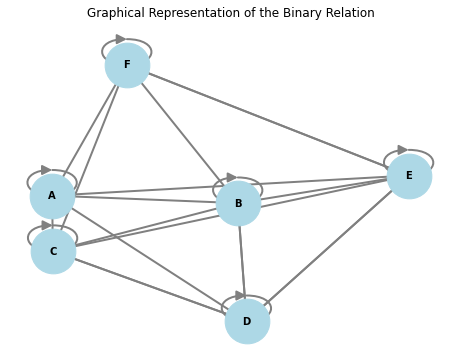

In [3]:
# Function to visualize the binary relation matrix
def Visualizebinaryrelation(matrix):
    # Create a directed graph from the matrix
    G = nx.DiGraph()
    
    # Get the labels for the nodes from the matrix index and columns
    labels = matrix.columns
    
    # Add edges based on the binary relation
    for i in range(len(labels)):
        for j in range(len(labels)):
            if matrix.iloc[i, j] == 1:  # If there's a relation, create an edge
                G.add_edge(labels[i], labels[j])
    
    # Draw the graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)  # Layout for positioning the nodes (deterministic with seed)
    
    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
    
    # Draw the edges with arrows
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray', width=2)
    
    # Draw labels on the nodes
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
    # Display the plot
    plt.title('Graphical Representation of the Binary Relation')
    plt.axis('off')  # Turn off the axis
    plt.show()

# Load the dataset from the Excel file (assuming it's already generated)
excel_file_path = 'data.xlsx'
df = pd.read_excel(excel_file_path, index_col=0)

# Visualize the binary relation
Visualizebinaryrelation(df)

#### A binary relation is Complete?

In [16]:
def CompleteCheck(matrix):
    n = matrix.shape[0]
    
    # Iterate over all pairs (i, j) with i != j
    for i in range(n):
        for j in range(n):
            if i != j:  # We don't need to check reflexive relations (i.e., i == j)
                # If neither x R y nor y R x holds, the relation is not complete
                if matrix.iloc[i, j] == 0 and matrix.iloc[j, i] == 0:
                    return False
    return True


excel_file_path = 'data.xlsx'
df = pd.read_excel(excel_file_path, index_col=0)
is_complete = CompleteCheck(df)
print(f"{'Yes' if is_complete else 'No'}")

No


#### is Reflexive?

In [10]:
def ReflexiveCheck(matrix):
    n = matrix.shape[0]
    
    # Check if for every element x in the set, x R x holds
    for i in range(n):
        if matrix.iloc[i, i] == 0:  # If x R x is not true, the relation is not reflexive
            return False
    return True


excel_file_path = 'data.xlsx'
df = pd.read_excel(excel_file_path, index_col=0)
is_reflexive = ReflexiveCheck(df)
print(f"Is the binary relation reflexive? {'Yes' if is_reflexive else 'No'}")

Is the binary relation reflexive? Yes


#### is Asymmetric?

In [11]:
def AsymmetricCheck(matrix):
    n = matrix.shape[0]
    
    # Iterate over all pairs (i, j) with i != j
    for i in range(n):
        for j in range(n):
            if i != j:
                # If x R y (matrix[i, j] == 1) and y R x (matrix[j, i] == 1), the relation is not asymmetric
                if matrix.iloc[i, j] == 1 and matrix.iloc[j, i] == 1:
                    return False
    return True
    

excel_file_path = 'data.xlsx'
df = pd.read_excel(excel_file_path, index_col=0)
is_asymmetric = AsymmetricCheck(df)
print(f"Is the binary relation asymmetric? {'Yes' if is_asymmetric else 'No'}")

Is the binary relation asymmetric? No


#### is Symmetric?

In [12]:
def SymmetricCheck(matrix):
    n = matrix.shape[0]
    
    # Iterate over all pairs (i, j) with i != j
    for i in range(n):
        for j in range(n):
            if i != j:
                # If x R y (matrix[i, j] == 1) but y R x (matrix[j, i] == 0), the relation is not symmetric
                if matrix.iloc[i, j] == 1 and matrix.iloc[j, i] == 0:
                    return False
    return True


excel_file_path = 'data.xlsx'
df = pd.read_excel(excel_file_path, index_col=0)
is_symmetric = SymmetricCheck(df)
print(f"Is the binary relation symmetric? {'Yes' if is_symmetric else 'No'}")

Is the binary relation symmetric? No


#### is Antisymmetric?

In [13]:
def AntisymmetricCheck(matrix):
    n = matrix.shape[0]
    
    # Iterate over all pairs (i, j) with i != j
    for i in range(n):
        for j in range(n):
            if i != j:
                # If x R y and y R x hold and x != y, the relation is not antisymmetric
                if matrix.iloc[i, j] == 1 and matrix.iloc[j, i] == 1:
                    return False
    return True


excel_file_path = 'data.xlsx'
df = pd.read_excel(excel_file_path, index_col=0)
is_antisymmetric = AntisymmetricCheck(df)
print(f"Is the binary relation antisymmetric? {'Yes' if is_antisymmetric else 'No'}")

Is the binary relation antisymmetric? No


#### is Transitive?

In [14]:
def TransitiveCheck(matrix):
    # Get the size of the matrix
    n = matrix.shape[0]
    
    # Iterate over all possible triples (i, j, k)
    for i in range(n):
        for j in range(n):
            for k in range(n):
                # If x R y (i, j) and y R z (j, k) hold, then x R z (i, k) must hold for the relation to be transitive
                if matrix.iloc[i, j] == 1 and matrix.iloc[j, k] == 1 and matrix.iloc[i, k] == 0:
                    return False
    return True


excel_file_path = 'data.xlsx'
df = pd.read_excel(excel_file_path, index_col=0)
is_transitive = TransitiveCheck(df)
print(f"Is the binary relation transitive? {'Yes' if is_transitive else 'No'}")

Is the binary relation transitive? No


#### is Negativetransitive?

In [15]:
def NegativetransitiveCheck(matrix):
    # Get the size of the matrix
    n = matrix.shape[0]
    
    # Iterate over all possible triples (i, j, k)
    for i in range(n):
        for j in range(n):
            for k in range(n):
                # If not(x R y) and not(y R z) hold, then not(x R z) must hold for the relation to be negatively transitive
                if matrix.iloc[i, j] == 0 and matrix.iloc[j, k] == 0 and matrix.iloc[i, k] == 1:
                    return False
    return True


excel_file_path = 'data.xlsx'
df = pd.read_excel(excel_file_path, index_col=0)
is_negativetransitive = NegativetransitiveCheck(df)
print(f"Is the binary relation negatively transitive? {'Yes' if is_negativetransitive else 'No'}")

Is the binary relation negatively transitive? No


#### is Complete Order/Total Order?

In [17]:
# Function to check if a binary relation is reflexive
def ReflexiveCheck(matrix):
    n = matrix.shape[0]
    for i in range(n):
        if matrix.iloc[i, i] == 0:
            return False
    return True

# Function to check if a binary relation is antisymmetric
def AntisymmetricCheck(matrix):
    n = matrix.shape[0]
    for i in range(n):
        for j in range(n):
            if i != j and matrix.iloc[i, j] == 1 and matrix.iloc[j, i] == 1:
                return False
    return True

# Function to check if a binary relation is transitive
def TransitiveCheck(matrix):
    n = matrix.shape[0]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                if matrix.iloc[i, j] == 1 and matrix.iloc[j, k] == 1 and matrix.iloc[i, k] == 0:
                    return False
    return True

# Function to check if a binary relation is total (complete)
def CompleteCheck(matrix):
    n = matrix.shape[0]
    for i in range(n):
        for j in range(n):
            if i != j and matrix.iloc[i, j] == 0 and matrix.iloc[j, i] == 0:
                return False
    return True

# Function to check if a binary relation is a total order (complete order)
def CompleteOrderCheck(matrix):
    if ReflexiveCheck(matrix) and AntisymmetricCheck(matrix) and TransitiveCheck(matrix) and CompleteCheck(matrix):
        return True
    else:
        return False


excel_file_path = 'data.xlsx'
df = pd.read_excel(excel_file_path, index_col=0)
is_total_order = CompleteOrderCheck(df)
print(f"Is the binary relation a total order? {'Yes' if is_total_order else 'No'}")

Is the binary relation a total order? No


#### Complete Pre-Order?

In [18]:
# Function to check if a binary relation is reflexive
def ReflexiveCheck(matrix):
    n = matrix.shape[0]
    for i in range(n):
        if matrix.iloc[i, i] == 0:
            return False
    return True

# Function to check if a binary relation is transitive
def TransitiveCheck(matrix):
    n = matrix.shape[0]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                if matrix.iloc[i, j] == 1 and matrix.iloc[j, k] == 1 and matrix.iloc[i, k] == 0:
                    return False
    return True

# Function to check if a binary relation is total (complete)
def CompleteCheck(matrix):
    n = matrix.shape[0]
    for i in range(n):
        for j in range(n):
            if i != j and matrix.iloc[i, j] == 0 and matrix.iloc[j, i] == 0:
                return False
    return True

# Function to check if a binary relation is a complete pre-order
def CompletePreOrderCheck(matrix):
    if ReflexiveCheck(matrix) and TransitiveCheck(matrix) and CompleteCheck(matrix):
        return True
    else:
        return False


excel_file_path = 'data.xlsx'
df = pd.read_excel(excel_file_path, index_col=0)
is_complete_pre_order = CompletePreOrderCheck(df)
print(f"Is the binary relation a complete pre-order? {'Yes' if is_complete_pre_order else 'No'}")

Is the binary relation a complete pre-order? No


#### Strict Relation returning the asymmetric part of a binary relation

In [19]:
# Function to return the asymmetric part of a binary relation
def StrictRelation(matrix):
    # Create a new matrix for the asymmetric part
    asymmetric_matrix = matrix.copy()
    
    # Get the size of the matrix
    n = matrix.shape[0]
    
    # Iterate over all pairs (i, j) with i != j
    for i in range(n):
        for j in range(n):
            if matrix.iloc[i, j] == 1 and matrix.iloc[j, i] == 1:
                # If both x R y and y R x hold, remove the relation from the asymmetric part
                asymmetric_matrix.iloc[i, j] = 0
    
    return asymmetric_matrix


excel_file_path = 'data.xlsx'
df = pd.read_excel(excel_file_path, index_col=0)

# Get the asymmetric part of the relation
asymmetric_part = StrictRelation(df)
print("Asymmetric part of the binary relation:")
print(asymmetric_part)

Asymmetric part of the binary relation:
   A  B  C  D  E  F
A  0  1  1  1  1  1
B  0  0  1  0  1  1
C  0  0  0  0  1  1
D  0  0  0  0  0  0
E  0  0  0  0  0  0
F  0  0  0  0  0  0


#### Indifference Relation returning the symmetric part of a binary relation

In [20]:
# Function to return the symmetric part (indifference relation) of a binary relation
def IndifferenceRelation(matrix):
    # Create a new matrix for the symmetric part
    symmetric_matrix = pd.DataFrame(np.zeros(matrix.shape, dtype=int), index=matrix.index, columns=matrix.columns)
    
    # Get the size of the matrix
    n = matrix.shape[0]
    
    # Iterate over all pairs (i, j) with i != j
    for i in range(n):
        for j in range(n):
            if i != j and matrix.iloc[i, j] == 1 and matrix.iloc[j, i] == 1:
                # If both x R y and y R x hold, keep the relation in the symmetric part
                symmetric_matrix.iloc[i, j] = 1
                symmetric_matrix.iloc[j, i] = 1  # Ensure symmetry
    
    return symmetric_matrix


excel_file_path = 'data.xlsx'
df = pd.read_excel(excel_file_path, index_col=0)

# Get the symmetric part of the relation (indifference relation)
symmetric_part = IndifferenceRelation(df)
print("Symmetric part (indifference relation) of the binary relation:")
print(symmetric_part)

Symmetric part (indifference relation) of the binary relation:
   A  B  C  D  E  F
A  0  0  0  0  0  0
B  0  0  0  1  0  0
C  0  0  0  1  0  0
D  0  1  1  0  1  0
E  0  0  0  1  0  1
F  0  0  0  0  1  0


#### Topologicalsorting1

In [21]:
# Function to return the asymmetric part of a binary relation (StrictRelation)
def StrictRelation(matrix):
    asymmetric_matrix = matrix.copy()
    n = matrix.shape[0]
    for i in range(n):
        for j in range(n):
            if matrix.iloc[i, j] == 1 and matrix.iloc[j, i] == 1:
                asymmetric_matrix.iloc[i, j] = 0
    return asymmetric_matrix

# Function to return the topological sorting of a given binary relation without cycles
def Topologicalsorting1(matrix):
    # Extract the asymmetric part of the binary relation
    asymmetric_matrix = StrictRelation(matrix)
    
    # Create a directed graph using NetworkX
    G = nx.DiGraph()
    
    # Get the labels for the nodes from the matrix index and columns
    labels = matrix.columns
    
    # Add directed edges based on the asymmetric part of the relation
    for i in range(len(labels)):
        for j in range(len(labels)):
            if asymmetric_matrix.iloc[i, j] == 1:
                G.add_edge(labels[i], labels[j])
    
    # Perform topological sort on the graph (only works if the graph is acyclic)
    try:
        topo_sort = list(nx.topological_sort(G))
        return topo_sort
    except nx.NetworkXUnfeasible:
        return "The graph contains cycles, so topological sorting is not possible."


excel_file_path = 'data.xlsx'
df = pd.read_excel(excel_file_path, index_col=0)

# Test the Topologicalsorting1 function
topo_sort_result = Topologicalsorting1(df)
print("Topological Sorting (Asymmetric part of the binary relation):")
print(topo_sort_result)

Topological Sorting (Asymmetric part of the binary relation):
['A', 'B', 'D', 'C', 'E', 'F']


#### Topologicalsorting2

In [22]:
# Function to return the asymmetric part of a binary relation (StrictRelation)
def StrictRelation(matrix):
    asymmetric_matrix = matrix.copy()
    n = matrix.shape[0]
    for i in range(n):
        for j in range(n):
            if matrix.iloc[i, j] == 1 and matrix.iloc[j, i] == 1:
                asymmetric_matrix.iloc[i, j] = 0
    return asymmetric_matrix

# Function to return the symmetric part (IndifferenceRelation)
def IndifferenceRelation(matrix):
    symmetric_matrix = pd.DataFrame(np.zeros(matrix.shape, dtype=int), index=matrix.index, columns=matrix.columns)
    n = matrix.shape[0]
    for i in range(n):
        for j in range(n):
            if i != j and matrix.iloc[i, j] == 1 and matrix.iloc[j, i] == 1:
                symmetric_matrix.iloc[i, j] = 1
                symmetric_matrix.iloc[j, i] = 1  # Ensure symmetry
    return symmetric_matrix

# Function to return the topological sorting considering both asymmetric and symmetric parts
def Topologicalsorting2(matrix):
    # Extract the asymmetric and symmetric parts of the binary relation
    asymmetric_matrix = StrictRelation(matrix)
    symmetric_matrix = IndifferenceRelation(matrix)
    
    # Create a directed graph using NetworkX
    G = nx.DiGraph()
    
    # Get the labels for the nodes from the matrix index and columns
    labels = matrix.columns
    
    # Add directed edges based on the asymmetric part of the relation
    for i in range(len(labels)):
        for j in range(len(labels)):
            if asymmetric_matrix.iloc[i, j] == 1:
                G.add_edge(labels[i], labels[j])
    
    # Group nodes that are in symmetric relation (indifference) as "equal"
    components = []
    visited = set()
    for i in range(len(labels)):
        if labels[i] not in visited:
            # Find all nodes that are symmetric (indifference) with the current node
            component = {labels[i]}
            for j in range(len(labels)):
                if symmetric_matrix.iloc[i, j] == 1:
                    component.add(labels[j])
            # Mark all found nodes as visited
            visited.update(component)
            components.append(component)

    # Topological sort with consideration of symmetric components
    try:
        topo_sort = list(nx.topological_sort(G))
        # For each node in the topological sort, replace it with its symmetric group (if any)
        final_sort = []
        for node in topo_sort:
            for component in components:
                if node in component:
                    # Add the entire component (group) only once
                    if component not in final_sort:
                        final_sort.append(component)
                    break
        return final_sort
    except nx.NetworkXUnfeasible:
        return "The graph contains cycles, so topological sorting is not possible."


excel_file_path = 'data.xlsx'
df = pd.read_excel(excel_file_path, index_col=0)

# Test the Topologicalsorting2 function
topo_sort_result = Topologicalsorting2(df)
print("Topological Sorting (Considering Asymmetric and Symmetric parts):")
print(topo_sort_result)

Topological Sorting (Considering Asymmetric and Symmetric parts):
[{'A'}, {'B', 'D'}, {'D', 'C'}, {'F', 'D', 'E'}]
